<a href="https://colab.research.google.com/github/Rakesh4538/EDA_TH_21BDS0255/blob/main/21BDS0255_RAKESHKUMAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#NAME : RAKESH KUMAR A
#REG.NO : 21BDS0255
#DATASET : https://raw.githubusercontent.com/salemprakash/EDA/main/Data/econmath.csv


First 5 rows of the dataset:
   rownames  age  work  study  econhs  colgpa  hsgpa  acteng  actmth   act  \
0         1   23  15.0   10.0       0  3.4909  3.355    24.0    26.0  27.0   
1         2   23   0.0   22.5       1  2.1000  3.219    23.0    20.0  24.0   
2         3   21  25.0   12.0       0  3.0851  3.306    21.0    24.0  21.0   
3         4   22  30.0   40.0       0  2.6805  3.977    31.0    28.0  31.0   
4         5   22  25.0   15.0       1  3.7454  3.890    28.0    31.0  32.0   

   mathscr  male  calculus  attexc  attgood  fathcoll  mothcoll  score  
0       10     1         1       0        0         1         1  84.43  
1        9     1         0       0        0         0         1  57.38  
2        8     1         1       1        0         0         1  66.39  
3       10     0         1       0        1         1         1  81.15  
4        8     1         1       0        1         0         1  95.90  

Missing Values in Dataset:
rownames     0
age          0
work  

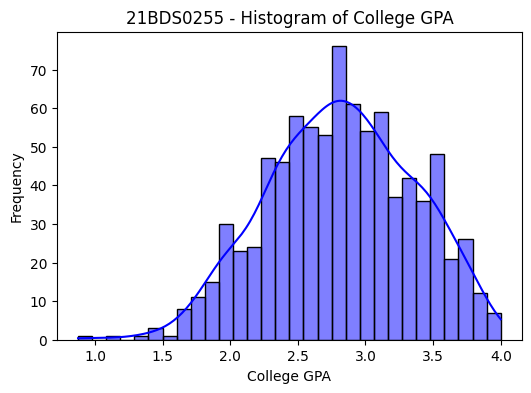

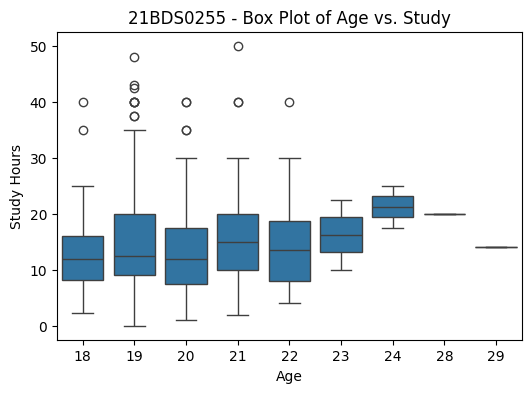

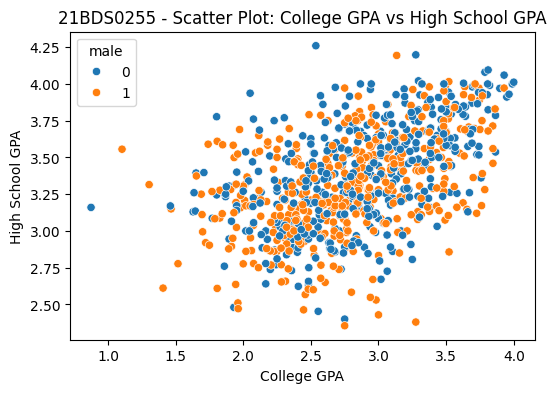

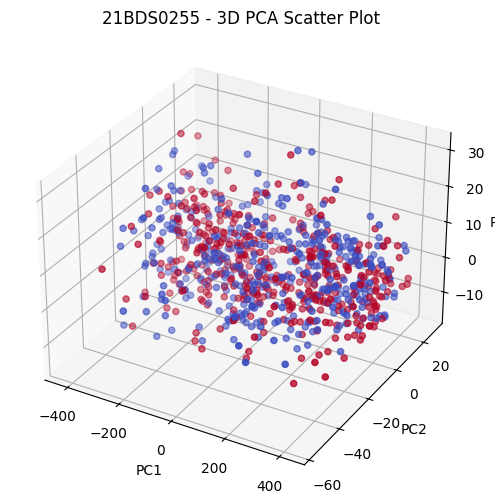

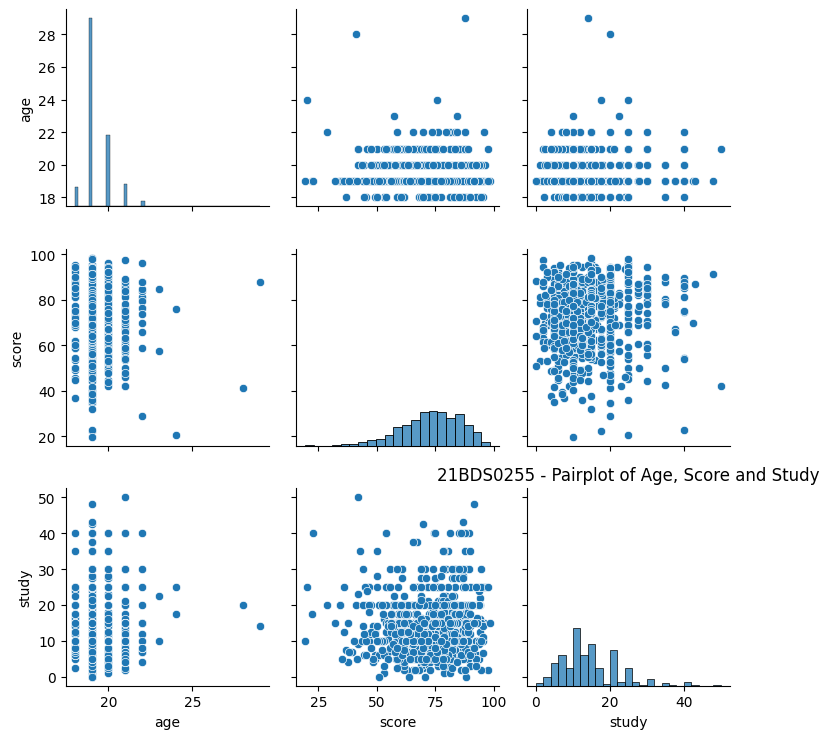

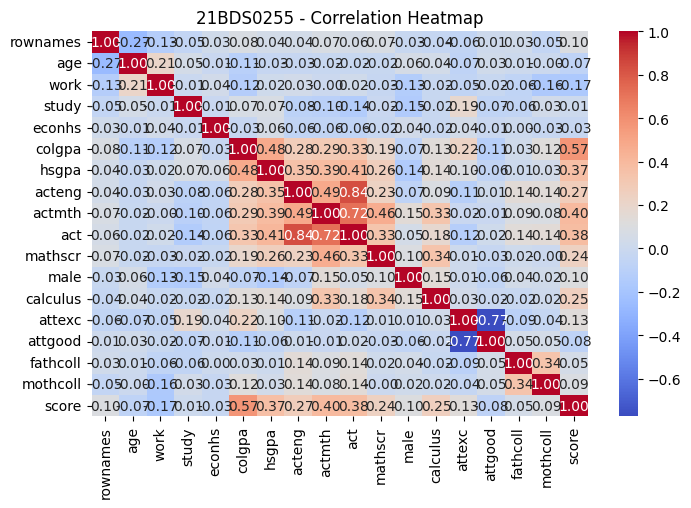


MODEL EVALUATION RESULTS:
R² Score: 0.1869
Mean Squared Error (MSE): 0.2213
Root Mean Squared Error (RMSE): 0.4704
Mean Absolute Error (MAE): 0.3506
Explained Variance Score: 0.2082

CLASSIFICATION METRICS (Binned GPA Categories):
Accuracy: 0.6919
Precision: 0.6268
Recall: 0.6919
F1 Score: 0.6574


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


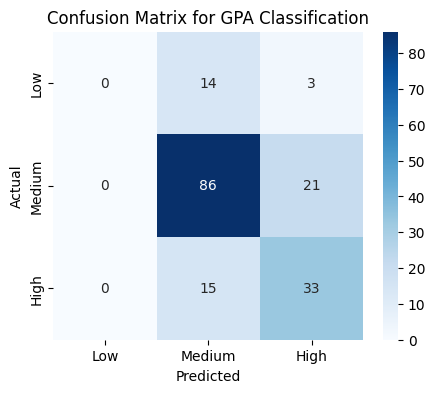

In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.cluster import KMeans

# --- LOAD DATASET ---
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/econmath.csv"
data = pd.read_csv(url)

# Display first few rows
print("First 5 rows of the dataset:")
print(data.head())

# --- DATA CLEANING ---
# Check for missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())

# Explore the dataset
print("Dataset Shape:", data.shape)
print("\nColumn Names:\n", data.columns)
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:\n", data.describe())

# Check if the values in the 'score' column are numeric
non_numeric_counts = data['score'].astype(str).str.isnumeric().value_counts()

print("Numeric and Non-Numeric Value Counts in 'score' Column:\n", non_numeric_counts)

# Fill missing values with mean for numerical data
data.fillna(data.mean(), inplace=True)

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

#DATA VISUALIZATION
# Histogram of College GPA
plt.figure(figsize=(6, 4))
sns.histplot(data['colgpa'], bins=30, kde=True, color="blue")
plt.title("21BDS0255 - Histogram of College GPA")
plt.xlabel("College GPA")
plt.ylabel("Frequency")
plt.show()

# Box Plot: Age vs Study
plt.figure(figsize=(6, 4))
sns.boxplot(x="age", y="study", data=data)
plt.xlabel("Age")
plt.ylabel("Study Hours")
plt.title("21BDS0255 - Box Plot of Age vs. Study")
plt.show()

# Scatter Plot: College GPA vs High School GPA
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['colgpa'], y=data['hsgpa'], hue=data['male'])
plt.title("21BDS0255 - Scatter Plot: College GPA vs High School GPA")
plt.xlabel("College GPA")
plt.ylabel("High School GPA")
plt.show()

# 3D Visualization using PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data.select_dtypes(include=[np.number]))
data_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])

# 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca['PC1'], data_pca['PC2'], data_pca['PC3'], c=data['male'], cmap='coolwarm')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("21BDS0255 - 3D PCA Scatter Plot")
plt.show()

# Multivariate Analysis - Pairplot
sns.pairplot(data[["age", "score", "study"]])
plt.title("21BDS0255 - Pairplot of Age, Score and Study")
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("21BDS0255 - Correlation Heatmap")
plt.show()

# MODEL BUILDING
# Define features (X) and target variable (y)
X = data.drop(columns=['colgpa'])
y = data['colgpa']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = model.predict(X_test_pca)

# --- REGRESSION METRICS ---
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print("\nMODEL EVALUATION RESULTS:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")

# --- CLASSIFICATION METRICS (Convert GPA to Categories)
bins = [0, 2, 3, 4]
labels = [0, 1, 2]  # 0 = Low, 1 = Medium, 2 = High
y_train_class = pd.cut(y_train, bins=bins, labels=labels)
y_test_class = pd.cut(y_test, bins=bins, labels=labels)

# Convert categorical labels to numerical
y_train_class = y_train_class.astype(int)
y_test_class = y_test_class.astype(int)

# Train a Logistic Regression model for classification
clf = LogisticRegression()
clf.fit(X_train_pca, y_train_class)
y_pred_class = clf.predict(X_test_pca)

# Compute classification metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted')
recall = recall_score(y_test_class, y_pred_class, average='weighted')
f1 = f1_score(y_test_class, y_pred_class, average='weighted')
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

print("\nCLASSIFICATION METRICS (Binned GPA Categories):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for GPA Classification")
plt.show()


First 5 rows of the dataset:
   rownames  age  work  study  econhs  colgpa  hsgpa  acteng  actmth   act  \
0         1   23  15.0   10.0       0  3.4909  3.355    24.0    26.0  27.0   
1         2   23   0.0   22.5       1  2.1000  3.219    23.0    20.0  24.0   
2         3   21  25.0   12.0       0  3.0851  3.306    21.0    24.0  21.0   
3         4   22  30.0   40.0       0  2.6805  3.977    31.0    28.0  31.0   
4         5   22  25.0   15.0       1  3.7454  3.890    28.0    31.0  32.0   

   mathscr  male  calculus  attexc  attgood  fathcoll  mothcoll  score  
0       10     1         1       0        0         1         1  84.43  
1        9     1         0       0        0         0         1  57.38  
2        8     1         1       1        0         0         1  66.39  
3       10     0         1       0        1         1         1  81.15  
4        8     1         1       0        1         0         1  95.90  

Missing Values in Dataset:
rownames     0
age          0
work  

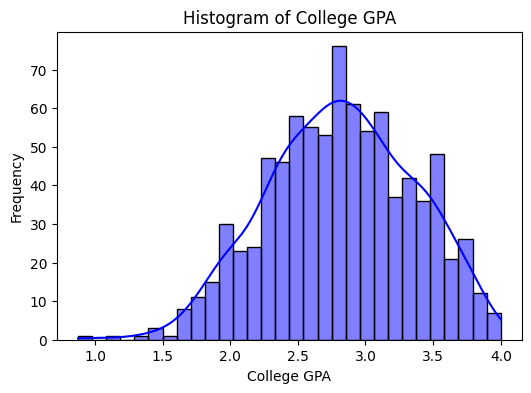

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt

